In [1]:
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [5]:
## let's get the dataset

In [70]:
col_names=['user_id','item_id','rating','timestamp']

df=pd.read_csv('ml-100k/u.data',sep="\t",names=col_names)

In [71]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [72]:
df['user_id'].nunique()

943

In [73]:
df['item_id'].nunique()

1682

In [74]:
# reading other file to match item id's with names

movies_title=pd.read_csv('ml-100k/u.item',sep='\|',header=None)

In [75]:
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
## extrcting 2 columns: movies id and movies name

movies_title=movies_title[[0,1]]


In [77]:
movies_title.columns = ['item_id','title']

In [78]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [79]:
#merging  the two data frames

df=pd.merge(df,movies_title,on='item_id')

In [81]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [82]:
##EDA

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
## number of reviews 
df['title'].value_counts()

Star Wars (1977)                                             583
Contact (1997)                                               509
Fargo (1996)                                                 508
Return of the Jedi (1983)                                    507
Liar Liar (1997)                                             485
                                                            ... 
Nobody Loves Me (Keiner liebt mich) (1994)                     1
I Don't Want to Talk About It (De eso no se habla) (1993)      1
Century (1993)                                                 1
Leopard Son, The (1996)                                        1
Lotto Land (1995)                                              1
Name: title, Length: 1664, dtype: int64

In [102]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)
pd=df.groupby('title').mean()['rating']

In [108]:
ratings=pd.to_frame()

In [111]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [112]:
ratings['no_of_ratigs']=df['title'].value_counts()

In [113]:
ratings

,rating,no_of_ratigs
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [119]:
ratings.sort_values('rating',ascending=False)

,rating,no_of_ratigs
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


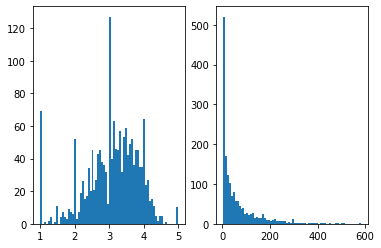

In [131]:
plt.subplot(1,2,1)
plt.hist(ratings['rating'],bins=70)

plt.subplot(1,2,2)
plt.hist(ratings['no_of_ratigs'],bins=70)
##plt.grid()
plt.show()

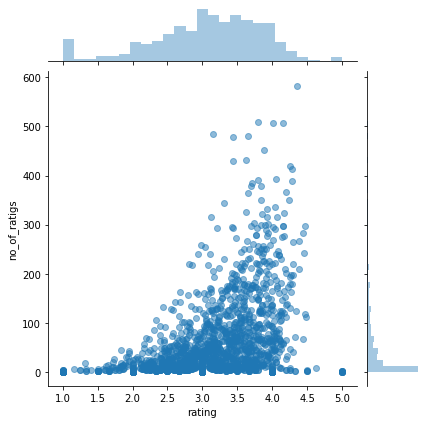

In [133]:
sns.jointplot(x='rating' ,y='no_of_ratigs' ,data=ratings,alpha=0.5)

In [186]:
## creating movie recommendation

In [187]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [188]:
movies_mat=df.pivot_table(index='user_id',columns='title', values='rating')

In [189]:
movies_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [190]:
ratings.sort_values('no_of_ratigs',ascending=False)

,rating,no_of_ratigs
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [191]:
star_wars_user_ratings=movies_mat['Star Wars (1977)']

In [192]:
similar_to_starwars=movies_mat.corrwith(star_wars_user_ratings)

In [154]:
corr_starwars=similar_to_starwars.to_frame()

In [157]:
corr_starwars.columns=['correlation']

In [159]:
corr_starwars.dropna(inplace=True)

In [162]:
corr_starwars.sort_values('correlation',ascending=False)

In [171]:
corr_starwars=corr_starwars.join(ratings['no_of_ratigs'])

In [177]:
corr_starwars[corr_starwars['no_of_ratigs']>100].sort_values('correlation',ascending=False).head()

,correlation,no_of_ratigs
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [176]:
### predict function

In [179]:
def predict_movies(movie_name):
    movie_user_ratings=movies_mat[movie_name]
    similar_to_movie=movies_mat.corrwith(movie_user_ratings)
    corr_movie=similar_to_movie.to_frame()
    corr_movie.columns=['correlation']
    corr_movie.dropna(inplace=True)
    corr_movie.sort_values('correlation',ascending=False)
    corr_movie=corr_movie.join(ratings['no_of_ratigs'])
    prediction=corr_movie[corr_movie['no_of_ratigs']>100].sort_values('correlation',ascending=False).head()
    
    return prediction

In [184]:
recommend=predict_movies('101 Dalmatians (1996)')

In [185]:
recommend

,correlation,no_of_ratigs
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150
